<a href="https://colab.research.google.com/github/arminnorouzi/machine_learning_course_UofA_MECE610/blob/main/L01_Introduction_to_Machine_Learning/L01a_Introduction_to-Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Note** that this document is created with the assistance of ChatGPT, a large language model trained by OpenAI (cutoff date: 2021). All information has been reviewed and approved by Farhad Davaripour and Armin Norouzi.

# 1. Supervised Learning - Regression

## 1.1 Linear Regression

### 1.1.1. Introduction

Linear regression is a statistical model that is used to predict a continuous response for a given predictor variable. It is a type of supervised learning algorithm in machine learning, which means that it is trained on labeled data, i.e. data that includes both input features (also known as predictors or independent variables) and a corresponding output or target variable (also known as the dependent variable).

In linear regression, the relationship between the predictor and the response is modeled using a linear function, which is a straight line. The model estimates the parameters of the linear function by minimizing the difference between the predicted values and the observed values of the response variable. The goal of linear regression is to find the line of best fit that accurately represents the relationship between the predictor and the response variables, so that we can use it to make predictions about the response for new values of the predictor.

Linear regression is a simple and widely used statistical method for predicting a continuous response. It is useful for understanding the relationship between different variables, and can be used for a variety of applications, such as predicting stock prices, analyzing the relationship between consumer spending and income, or predicting the probability of an event occurring.

Here is an example of a scatterplot with a line of best fit, which represents the result of a linear regression model:

<p align="center">
<img src=../Figures/Linear_regression_example.png  width="500" height="475">
<figcaption align = "center"><b>Fig.1 an example of a linear regression</p></b></figcaption>

The equation of a linear regression model has the following format:

$$
\hat{y} = \theta_{0} + \theta_{1}*x_{1} + \theta_{2}*x_{2} + ... + \theta_{n}*x_{n}
$$

where:

- y is the dependent variable (the variable we are trying to predict)
- $x_1$, $x_2$, ..., $x_n$ are the independent variables (also called the predictor variables or features)
- $\theta_0$ is the intercept, which is the value of y when all of the x variables are equal to 0
- $\theta_1$, $\theta_2$, ..., $\theta_n$ are the coefficients or weights, which represent the strength and direction of the relationship between each x variable and y

The equation could be simplified in the following form:

$$
\hat{y} = \theta_0 + \mathbf{\theta}^T  \mathbf{x}
$$

and then:
$$
    \hat{y} = \theta_0 +  \mathbf{\theta}^T  \mathbf{x} =
    \begin{bmatrix}
    \theta_0 &  \mathbf{\theta}^T
    \end{bmatrix}
    \begin{bmatrix}
    1\\
     \mathbf{x}
    \end{bmatrix}.
$$



**Using Mean Squared Error (MSE) loss**

The mean squared error (MSE) loss function is a measure of the difference between the predicted values and the actual values in a regression problem. It is defined as the mean of the squared differences between the predicted values $\hat{y}$ and the actual values y:

$$
L(\theta) = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2
$$


The MSE loss function is commonly used in linear regression models to measure the accuracy of the model and to optimize the model parameters during training. To minimize the MSE  we need to find the values of the coefficients that minimize the MSE loss function:

\begin{equation}
\begin{split}
     \underset{ \mathbf{\theta}}{\min}
     \frac{1}{n}\sum_{i=1}^{n} \left( y_i -  \mathbf{\theta}^T  \mathbf{x}_i \right)^2
\end{split}
\end{equation}

This can be done by taking the derivative of the MSE loss function with respect to each coefficient and setting it to 0:

$$
\frac{\partial L(\hat{y}, y)}{\partial \theta_j} = 0
$$



### 1.1.2 Example of Linear Regression with Single Feature


To generate a dataset for a linear regression problem, you can use the make_regression function from the sklearn.datasets module.

Below is an example of how you can use this function. This will generate a dataset with 100 samples and 1 feature (predictor variable), and the target variable (response variable) will be generated by adding some noise to a linear function of the predictor variable. The noise parameter controls the amount of noise added to the target variable.

In [1]:
# Clear all previous variables
%reset -f

In [2]:
import numpy as np
from sklearn.datasets import make_regression

# Generate the dataset
X_lr, y_lr = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)

# Print the shape of the generated data
print("Shape of X:", X_lr.shape)
print("Shape of y:", y_lr.shape)

Shape of X: (200, 1)
Shape of y: (200,)


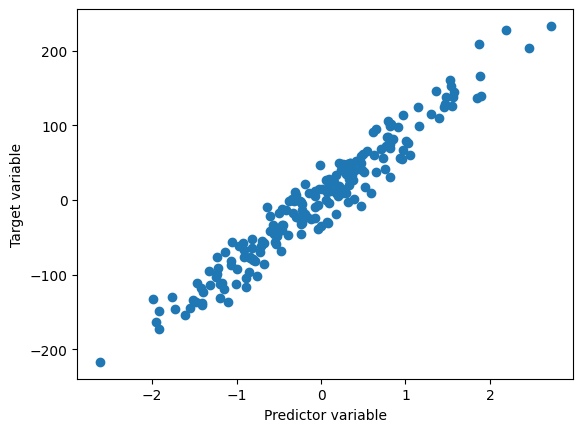

In [3]:
import matplotlib.pyplot as plt

# Create a scatter plot of the data
plt.scatter(X_lr, y_lr)

plt.xlabel('Predictor variable')
plt.ylabel('Target variable')

plt.show()

In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

Let's use the cost function and gradient descent algorithm to find the optimal values of the coefficients for a linear regression model.

In [5]:
def mse_cost_function(X, y, theta):
    m = len(y)
    h = X.dot(theta)
    J = (1/(2*m))*np.sum((h-y)**2)
    return J

In [6]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    J_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, theta.shape[0]))
    
    for i in range(iterations):
        h = X.dot(theta)
        loss = h - y
        gradient = X.T.dot(loss) / m
        theta = theta - alpha * gradient
        J_history[i] = mse_cost_function(X, y, theta)
        theta_history[i, :] = theta

    return theta, J_history, theta_history

In [7]:
# Add a column of ones to X
X_lr_train_up = np.c_[np.ones(len(X_lr_train)), X_lr_train]

# Set the learning rate and number of iterations
alpha = 0.01
iterations = 1000

# Initialize theta
theta = np.zeros(2)

# Compute the optimal values of theta using gradient descent
theta, J_history, theta_history= gradient_descent(X_lr_train_up, y_lr_train, theta, alpha, iterations)

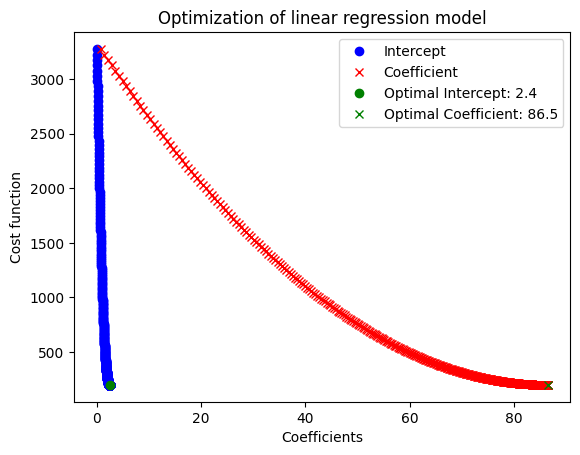

In [8]:
# Plot J_history against theta_history
plt.plot(theta_history[:, 0], J_history, 'bo')
plt.plot(theta_history[:, 1], J_history, 'rx')
plt.plot(theta[0], mse_cost_function(X_lr_train_up, y_lr_train, theta), 'go')
plt.plot(theta[1], mse_cost_function(X_lr_train_up, y_lr_train, theta), 'gx')
plt.xlabel('Coefficients')
plt.ylabel('Cost function')
plt.title('Optimization of linear regression model')
plt.legend(['Intercept', 'Coefficient', 'Optimal Intercept: {:.1f}'.format(theta[0]), 'Optimal Coefficient: {:.1f}'.format(theta[1])])
plt.show()

plt.show()

In [10]:
# Print the intercept and coefficient
print(f"Optimized intercept:, {round(theta[0],1)}")
print(f"Optimized coefficient:, {round(theta[1],1)}")

Optimized intercept:, 2.4
Optimized coefficient:, 86.5


We can then use the scikit-learn library to obtain the coefficients for the linear function and compare them with the ones obtained using the MSE cost function and gradient descent algorithm.

In [11]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model_lr = LinearRegression()

# Fit the model to the data
model_lr.fit(X_lr_train, y_lr_train)

# Get the coefficients of the model (θ values)
b0, b1 = model_lr.intercept_, model_lr.coef_
print(f'Optimized intercept is: {round(b0,1)}')
print(f'Optimized coefficient is: {round(b1[0],1)}')

Optimized intercept is: 2.4
Optimized coefficient is: 86.5


In [12]:
# Predict using the model
y_lr_pred = model_lr.predict(X_lr_test)

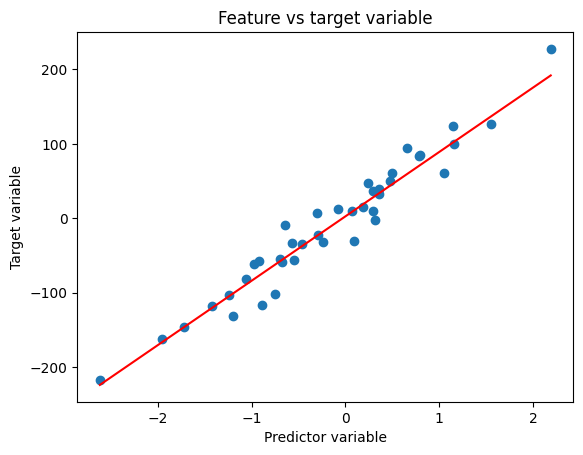

In [13]:
# Create a scatter plot of the test data
plt.scatter(X_lr_test, y_lr_test)

# Generate a range of x-values to plot the regression line
x_range = np.linspace(np.min(X_lr_test), np.max(X_lr_test), 100)

# Compute the y-values of the regression line
y_line = b0 + b1 * x_range

# Plot the regression line
plt.plot(x_range, y_line, 'r')

plt.title('Feature vs target variable')
plt.xlabel('Predictor variable')
plt.ylabel('Target variable')

plt.show()

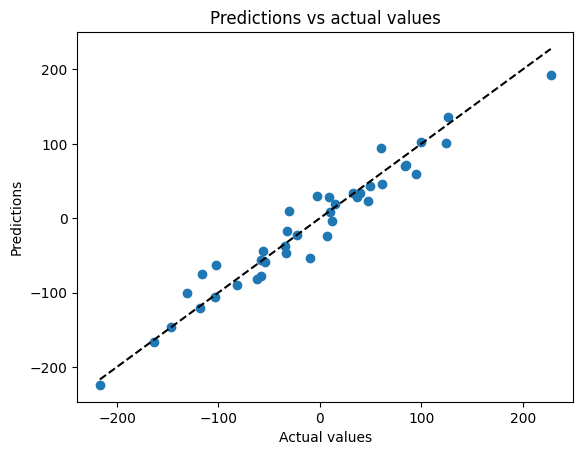

In [14]:
# Plot the predictions against the true values
plt.scatter(y_lr_test, y_lr_pred)

# Add a 45 degree line
x = np.linspace(np.min(y_lr_test), np.max(y_lr_test), 2)
plt.plot(x, x, '--k')

plt.title('Predictions vs actual values')
plt.xlabel('Actual values')
plt.ylabel('Predictions')

plt.show()

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute the R-squared score
r2_lr = round(r2_score(y_lr_test, y_lr_pred),2)

# Compute the mean squared error
mse_lr = round(mean_squared_error(y_lr_test, y_lr_pred),2)

# Print the results
print("R-squared score:", r2_lr)
print("Mean squared error:", mse_lr)
print("Root mean squared error:", round(mse_lr**0.5,2))

R-squared score: 0.94
Mean squared error: 437.55
Root mean squared error: 20.92


Let's do statistical analysis on the model results using the OLS function from statsmodels. Note that when fitting a linear regression model using the OLS function from statsmodels, you can add a constant term to the predictor variables by using the add_constant function. The constant term, also known as the intercept, is the value of the response variable when all the predictor variables are zero. It allows the model to have a non-zero intercept even if all the predictor variables are zero.

In [16]:
import statsmodels.api as sm

# Add a constant term to the predictor variables
X_train_with_const = sm.add_constant(X_lr_train)

# Fit the model using OLS (ordinary least squares)
model_lr = sm.OLS(y_lr_train, X_train_with_const)
results_lr = model_lr.fit()

# Print the summary
print(results_lr.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     2474.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           2.01e-98
Time:                        07:48:35   Log-Likelihood:                -706.19
No. Observations:                 160   AIC:                             1416.
Df Residuals:                     158   BIC:                             1423.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4461      1.590      1.539      0.1

In [17]:
# Extract the coefficients
coef_lr = results_lr.params
print("Coefficients (coef):", coef_lr)

# Extract the standard errors of the coefficients
se_lr = results_lr.bse
print("standard errors of the coefficients (std err):", se_lr)

# Extract the t-values of the coefficients
t_lr = results_lr.tvalues
print("t-values (t):", t_lr)

# Extract the p-values of the coefficients
p_lr = results_lr.pvalues
print("p-values (P>|t|):", p_lr)

Coefficients (coef): [ 2.44610218 86.51154198]
standard errors of the coefficients (std err): [1.5896194  1.73920238]
t-values (t): [ 1.53879739 49.74207878]
p-values (P>|t|): [1.25854051e-01 2.00882011e-98]


The OLS function from statsmodels fits a linear regression model to the data using ordinary least squares and returns a results object that contains various statistical measures of the model. Here is a description of some of the important parameters in the results object:

- Coef: This is an array of the coefficients of the model. The first element is the intercept term, and the remaining elements are the coefficients of the predictor variables.

- std err: This is an array of the standard errors of the coefficients. The standard error is a measure of the uncertainty in the estimate of the coefficient.

- t: This is an array of the t-values of the coefficients. The t-value is the coefficient divided by its standard error.

- P>|t|: This is an array of the p-values of the coefficients. The p-value is the probability that the coefficient is zero or that the observed value of the coefficient would be obtained by chance if the true coefficient is zero.

To assess the significance of the coefficients, you can perform hypothesis tests using the t-values and p-values. For example, you can perform a t-test to test the null hypothesis that the coefficient is zero. If the p-value is smaller than a pre-specified significance level (e.g., 0.05), then you can reject the null hypothesis and conclude that the coefficient is significantly different from zero.

You can also use the conf_int function to compute confidence intervals for the coefficients. A confidence interval is an interval estimate of the true value of the coefficient that is likely to contain the true value with a certain probability (e.g., 95%). If the interval does not contain zero, then the coefficient is significantly different from zero at the specified significance level. Note that the interval values also exist in the ols summary report.

Below is an example of how you can perform a t-test and compute confidence intervals for the coefficients. This will print the t-values, p-values, and confidence intervals for the coefficients, and it will also perform a t-test for each coefficient to test the hypothesis that it is zero. If the p-value is smaller than 0.05, it will print a message indicating that the coefficient is significantly different from zero.

In [18]:
# Compute the confidence intervals for the coefficients
conf_int = results_lr.conf_int()

# Print the t-values, p-values, and confidence intervals
print("t-values:", results_lr.tvalues)
print("p-values:", results_lr.pvalues)
print("Confidence intervals:", conf_int)

# Test the hypothesis that the coefficient is zero
for i, p in enumerate(results_lr.pvalues):
    if p < 0.05:
        print(f"Coefficient {i} is significantly different from zero")
    else:
        print(f"Coefficient {i} is not statistically significant and does not make a meaningful contribution to the model")

t-values: [ 1.53879739 49.74207878]
p-values: [1.25854051e-01 2.00882011e-98]
Confidence intervals: [[-0.69354249  5.58574686]
 [83.07645714 89.94662682]]
Coefficient 0 is not statistically significant and does not make a meaningful contribution to the model
Coefficient 1 is significantly different from zero


### 1.1.3 Example of Linear Regression with Multiple Features

To add a feature to the linear regression model in the previous example, you can simply generate a new dataset with the desired number of features using the make_regression function from sklearn.datasets.

In [19]:
# Clear all previous variables
%reset -f

In [20]:
import numpy as np
from sklearn.datasets import make_regression

# Generate the dataset with 20 features
X_mlr, y_mlr = make_regression(n_samples=200, n_features=20, noise=20, random_state=42)

In [21]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_mlr_train, X_mlr_test, y_mlr_train, y_mlr_test = train_test_split(X_mlr, y_mlr, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model_mlr = LinearRegression()

# Fit the model to the data
results_mlr = model_mlr.fit(X_mlr_train, y_mlr_train)

# Predict using the model
y_mlr_pred = model_mlr.predict(X_mlr_test)

# Get the coefficients of the model
b0, b1, b2 = results_mlr.intercept_, results_mlr.coef_[0], results_mlr.coef_[1]
print('Intercept is: ', round(b0,2), '\nfirst coefficient is: ',round(b1,2), '\nsecond coefficient is: ',round(b2,2))

Intercept is:  -1.86 
first coefficient is:  -0.56 
second coefficient is:  -0.89


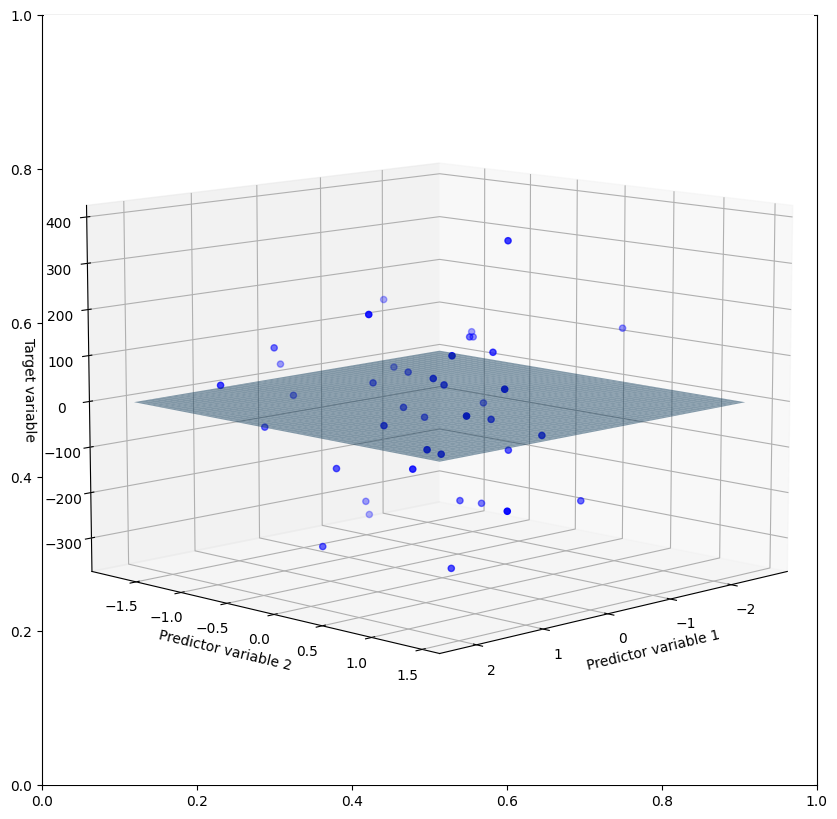

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(figsize=(10,10))

# Create a 3D scatter plot of the data
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_mlr_test[:, 0], X_mlr_test[:, 1], y_mlr_test, c='blue', marker='o', label='True values')

# Generate a range of x1-values and x2-values to plot the regression surface
x1_range = np.linspace(np.min(X_mlr_test[:, 0]), np.max(X_mlr_test[:, 0]), 100)
x2_range = np.linspace(np.min(X_mlr_test[:, 1]), np.max(X_mlr_test[:, 1]), 100)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

# Compute the y-values of the regression surface
y_surface = b0 + b1 * x1_mesh + b2 * x2_mesh

# Plot the regression surface
ax.plot_surface(x1_mesh, x2_mesh, y_surface, alpha=0.5)
ax.view_init(elev=10, azim=45)

ax.set_xlabel('Predictor variable 1')
ax.set_ylabel('Predictor variable 2')
ax.set_zlabel('Target variable')

plt.show()


In [24]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate the mean absolute error and R^2 score
r2_mlr = r2_score(y_mlr_test, y_mlr_pred)
mae_mlr = mean_absolute_error(y_mlr_test, y_mlr_pred)

# Print the results
print(f"R^2 Score: {r2_mlr:.2f}")
print(f"Mean Absolute Error: {mae_mlr:.2f}")
print(f"Root mean Absolute Error: {mae_mlr**0.5:.2f}")

R^2 Score: 0.98
Mean Absolute Error: 14.10
Root mean Absolute Error: 3.76


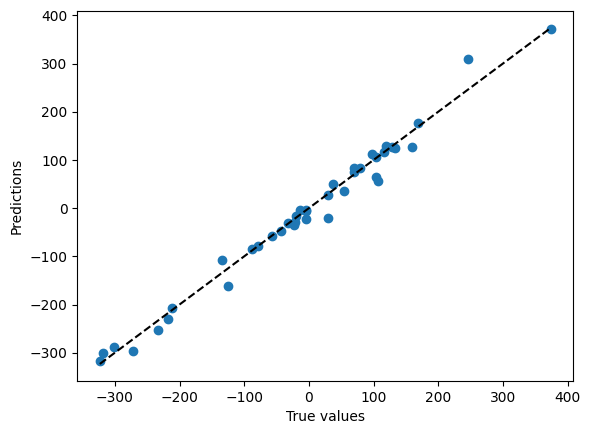

In [25]:
import matplotlib.pyplot as plt

# Plot the predictions against the true values
plt.scatter(y_mlr_test, y_mlr_pred)

# Add a 45 degree line
x = np.linspace(np.min(y_mlr_test), np.max(y_mlr_test), 2)
plt.plot(x, x, '--k')

plt.xlabel('True values')
plt.ylabel('Predictions')

plt.show()

## 1.2 Polynomial Regression

Polynomial regression is a non-linear regression model that can capture more complex relationships between the predictor variable(s) and the target variable by using higher-order polynomial functions (quadratic, cubic, etc.) to fit the data. Polynomial regression can be more flexible than linear regression, as it can fit data that is not linearly related. However, polynomial regression can be more prone to overfitting, and it can be harder to interpret the model parameters compared to linear regression. In general, polynomial regression can be useful when the relationship between the predictor and target variable is non-linear, but linear regression may be more appropriate when the relationship is linear.

In [26]:
# Clear all previous variables
%reset -f

[]

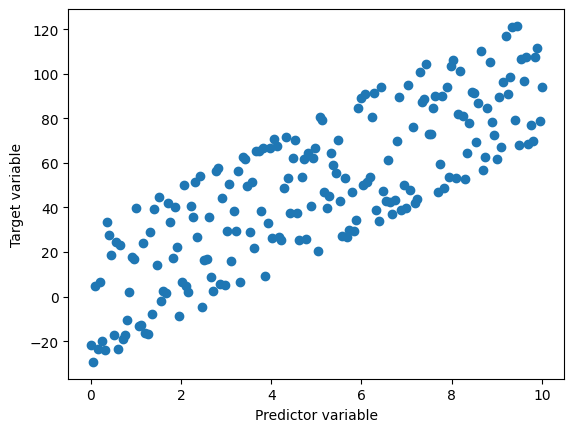

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Generate original data
X_poly = np.linspace(0,10,200)
y_poly = 10* X_poly

# Add random noise to y_poly
noise = np.random.normal(0, 3, size=len(y_poly))
y_poly = y_poly + 30*np.cos(noise)

# Plot the noised data
plt.scatter(X_poly, y_poly)
plt.xlabel('Predictor variable')
plt.ylabel('Target variable')
plt.plot()

In [28]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Create a polynomial model
deg = 16
poly = PolynomialFeatures(degree=deg, include_bias=False)

# Transform the features
X_poly_train_tr = poly.fit_transform(X_poly_train.reshape(-1, 1))
X_poly_test_tr = poly.fit_transform(X_poly_test.reshape(-1, 1))

# Create a linear regression model
poly_reg_model = LinearRegression()

# # Fit the model to the data
results_poly = poly_reg_model.fit(X_poly_train_tr, y_poly_train)

# # Predict using the model
y_poly_pred = poly_reg_model.predict(X_poly_test_tr)

In [30]:
# Get the coefficients and intercept
coefficients = results_poly.coef_
print(f'coefficients are {[round(i, 2) for i in coefficients]}')

intercept = results_poly.intercept_
print(f'intercept is {round(intercept,2)}')

coefficients are [2.49, 2.93, 3.82, 2.57, -0.19, -2.45, -0.81, 2.57, -1.62, 0.54, -0.11, 0.02, -0.0, 0.0, -0.0, 0.0]
intercept is -6.54


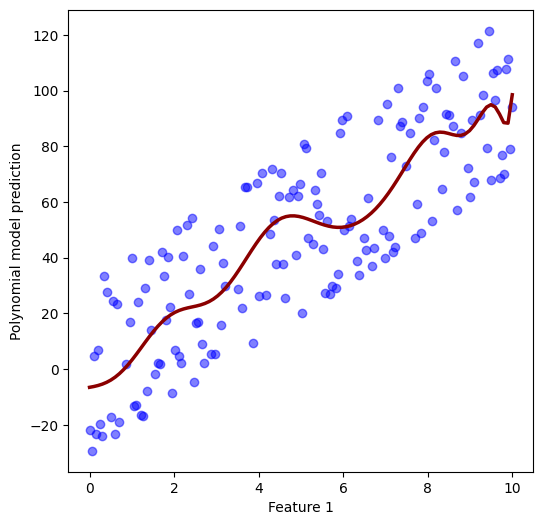

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6))

# Create a 2D scatter plot of the data
ax.scatter(X_poly_train_tr[:, 0], y_poly_train, c='blue', marker='o', label='True values', alpha = 0.5)

# Generate a range of X_poly_train values
x_range = np.linspace(X_poly_train.min(), X_poly_train.max(), 100)

# Transform the range of X_poly_train values
x_range_tr = poly.transform(x_range.reshape(-1, 1))

# Predict the values for the range of X_poly_train values
y_range_pred = poly_reg_model.predict(x_range_tr)

# Plot the predicted values on the 2D scatter plot
ax.plot(x_range_tr[:,0], y_range_pred, color='darkred', linewidth =2.5)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Polynomial model prediction')

plt.show()


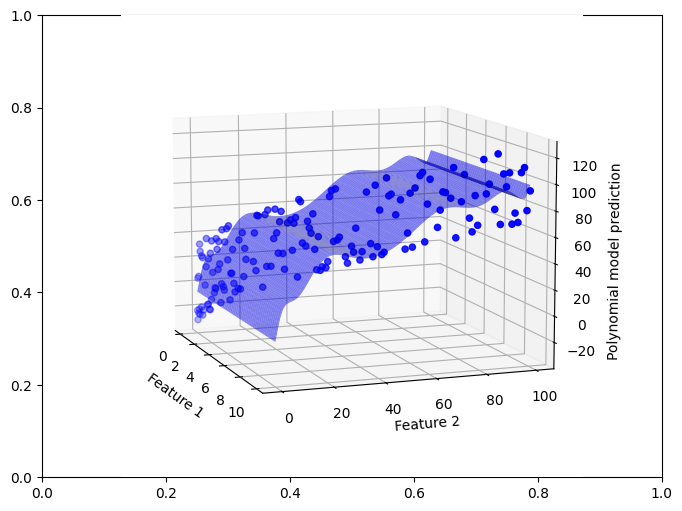

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(figsize=(8,6))

# Create a 3D scatter plot of the data
ax = fig.add_subplot(111, projection='3d', elev=10, azim=-20)
ax.scatter(X_poly_train_tr[:, 0], X_poly_train_tr[:, 1], y_poly_train, c='blue', marker='o', label='True values')

# Generate a range of X_poly_train values
x_range = np.linspace(X_poly_train.min(), X_poly_train.max(), 100)

# Transform the range of X_poly_train values
x_range_tr = poly.transform(x_range.reshape(-1, 1))

# Predict the values for the range of X_poly_train values
y_range_pred = poly_reg_model.predict(x_range_tr)

# Create a meshgrid of the X_poly_train and predicted Y values
X, Y = np.meshgrid(np.array([i[0] for i in x_range_tr]), np.array([i[1] for i in x_range_tr]))

# Create the 3D plot
ax.plot_surface(X, Y, y_range_pred.reshape(-1,1), color='b', alpha = 0.5)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Polynomial model prediction')

plt.show()

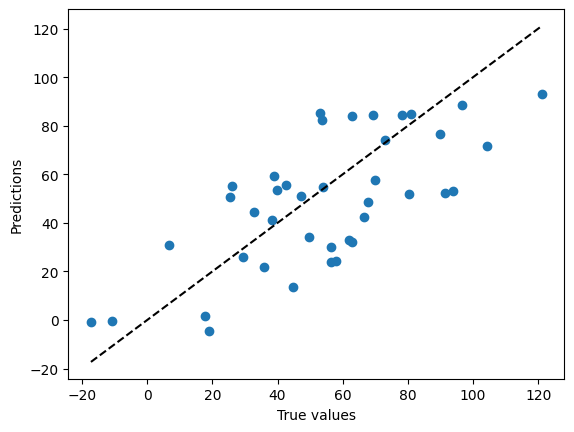

In [33]:
import matplotlib.pyplot as plt

# Plot the predictions against the true values
plt.scatter(y_poly_test, y_poly_pred)

# Add a 45 degree line
x = np.linspace(np.min(y_poly_test), np.max(y_poly_test), 2)
plt.plot(x, x, '--k')

plt.xlabel('True values')
plt.ylabel('Predictions')

plt.show()

In [34]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate the mean absolute error and R^2 score
r2_mlr = r2_score(y_poly_test, y_poly_pred)
mae_mlr = mean_absolute_error(y_poly_test, y_poly_pred)

# Print the results
print(f"R^2 Score: {r2_mlr:.2f}")
print(f"Mean Absolute Error: {mae_mlr:.2f}")
print(f"Root mean Absolute Error: {mae_mlr**0.5:.2f}")

R^2 Score: 0.42
Mean Absolute Error: 19.57
Root mean Absolute Error: 4.42


Given the very high polynomial degree used in this example, there is a noticeable overfitting of training data. In other words the model fits the training data well, but performs poorly on new data. To mitigate this problem, one solution is to reduce the degree of the polynomial, which can result in a simpler model that is less prone to overfitting. Another solution is to use regularization techniques such as Lasso regression, which adds a penalty term to the cost function that discourages the model from using too many features. This can help to prevent overfitting by reducing the complexity of the model and making it more generalizable to new data. Overall, selecting an appropriate polynomial degree and applying regularization can help to balance the trade-off between model complexity and overfitting, leading to better performance on new data.

## 1.3 Lasso Regression

Lasso regularization is a type of linear regression that uses regularization. It helps to reduce the complexity of the model and prevent overfitting by adding a penalty term to the objective function. The penalty term is the sum of the absolute values of the coefficients of the features, multiplied by a regularization hyperparameter alpha. The higher the value of alpha, the stronger the regularization, and the smaller the values of the coefficients. This can lead to a more parsimonious model, where some of the features may have zero coefficients, which means they are not important for predicting the target.

Here is an example of using the lasso regreggion model to overcome the overfitting in the above example with polynomial regression.

In [35]:
# Clear all previous variables
%reset -f

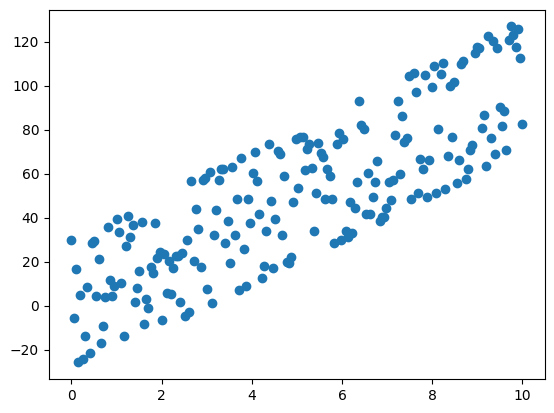

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Generate original data
X_lasso = np.linspace(0,10,200)
y_lasso = 10* X_lasso

# Add random noise to y_lasso
noise = np.random.normal(0, 3, size=len(y_lasso))
y_lasso = y_lasso + 30*np.cos(noise)

# Plot the noised data
plt.scatter(X_lasso, y_lasso)

In [37]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_lasso_train, X_lasso_test, y_lasso_train, y_lasso_test = train_test_split(X_lasso, y_lasso, test_size=0.2, random_state=42)

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Create a polynomial model
poly = PolynomialFeatures(degree=16, include_bias=False)

# Transform the features
X_lasso_train_tr = poly.fit_transform(X_lasso_train.reshape(-1, 1))
X_lasso_test_tr = poly.fit_transform(X_lasso_test.reshape(-1, 1))

# Create a lasso model
lasso_model = Lasso()

# Define the parameter range for alpha
param_grid = {'alpha': np.linspace(10**-5, 10, num=300)}

# Use GridSearchCV to find the optimal alpha
grid_search = GridSearchCV(lasso_model, param_grid, cv=10)

# Fit the model to the data
results_lasso = grid_search.fit(X_lasso_train_tr, y_lasso_train)

# Get the best alpha
best_alpha = results_lasso.best_params_['alpha']
print(f'best alpha is {best_alpha}')

c:\Users\Farhad.Davaripour\Anaconda3\envs\main\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.945e+04, tolerance: 1.862e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Farhad.Davaripour\Anaconda3\envs\main\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.810e+04, tolerance: 1.970e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Farhad.Davaripour\Anaconda3\envs\main\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

best alpha is 1.9063626086956524


c:\Users\Farhad.Davaripour\Anaconda3\envs\main\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.179e+04, tolerance: 1.970e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Farhad.Davaripour\Anaconda3\envs\main\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.243e+04, tolerance: 2.025e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Farhad.Davaripour\Anaconda3\envs\main\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

Armin_ I will figure out the convergence error for finding alpha and will fix it once you are done with your review/improvement.

In [39]:
# Use the best alpha to make predictions
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_lasso_train_tr, y_lasso_train)
y_lasso_pred = lasso_model.predict(X_lasso_test_tr)

c:\Users\Farhad.Davaripour\Anaconda3\envs\main\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.265e+04, tolerance: 2.135e+01
  model = cd_fast.enet_coordinate_descent(


In [40]:
# Get the coefficients and intercept
coefficients = lasso_model.coef_
print(f'coefficients are {[round(i, 3) for i in coefficients]}')

intercept = lasso_model.intercept_
print(f'intercept is {round(intercept,2)}')

coefficients are [0.0, 2.872, -0.204, -0.011, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0]
intercept is 8.16


Armin jan, The below cell is supposed to generate the similar coefficients as the ones from Sklearn library. I am working on it and will add the updated one once you are done reviewing/enhancing the notebook.

In [41]:
# from sklearn.preprocessing import StandardScaler

# # Normalize the features
# scaler = StandardScaler()
# X_lasso_train_tr = scaler.fit_transform(X_lasso_train_tr)
# X_lasso_test_tr = scaler.transform(X_lasso_test_tr)

# # Define the cost function for Lasso regression
# def cost_function(X, y, theta, alpha):
#     m = len(y)
#     predictions = X.dot(theta)
#     mse = np.sum((predictions - y) ** 2) / (2 * m)
#     l1_norm = alpha * np.sum(np.abs(theta))
#     cost = mse + l1_norm
#     return cost

# # Define the gradient function for Lasso regression
# def gradient(X, y, theta, alpha):
#     m = len(y)
#     predictions = X.dot(theta)
#     error = predictions - y
#     grad = (1 / m) * X.T.dot(error) + alpha * np.sign(theta)
#     return grad

# # Set the learning rate and number of iterations
# learning_rate = 0.001
# iterations = 10000

# # Initialize theta to zeros
# theta = np.zeros(X_lasso_train_tr.shape[1])

# # Perform gradient descent
# for i in range(iterations):
#     cost = cost_function(X_lasso_train_tr, y_lasso_train, theta, best_alpha)
#     grad = gradient(X_lasso_train_tr, y_lasso_train, theta, best_alpha)
#     theta = theta - learning_rate * grad
#     print('Iteration:', i, 'Cost:', cost, 'Grad:', grad, 'Theta:', theta)

# # Print the learned parameters
# print('Learned Parameters:', theta)


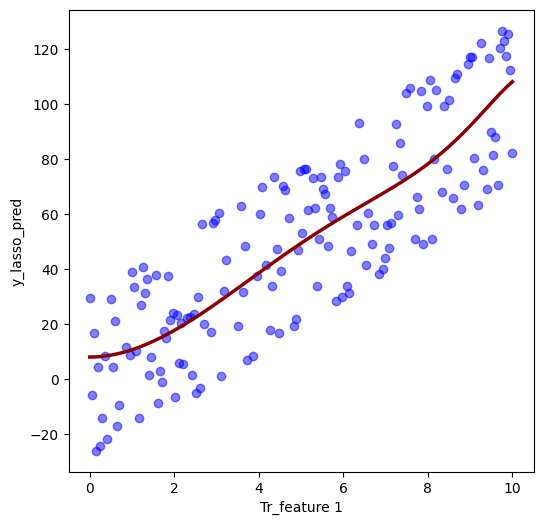

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6))

# Create a 2D scatter plot of the data
ax.scatter(X_lasso_train_tr[:, 0], y_lasso_train, c='blue', marker='o', label='True values', alpha= 0.5)

# Generate a range of X_lasso_train values
x_range = np.linspace(X_lasso_train.min(), X_lasso_train.max(), 100)

# Transform the range of X_lasso_train values
x_range_tr = poly.transform(x_range.reshape(-1, 1))

# Predict the values for the range of X_lasso_train values
y_range_pred = lasso_model.predict(x_range_tr)

# Plot the predicted values on the 2D scatter plot
ax.plot(x_range_tr[:,0], y_range_pred, color='darkred', linewidth =2.5)
ax.set_xlabel('Tr_feature 1')
ax.set_ylabel('y_lasso_pred')

plt.show()


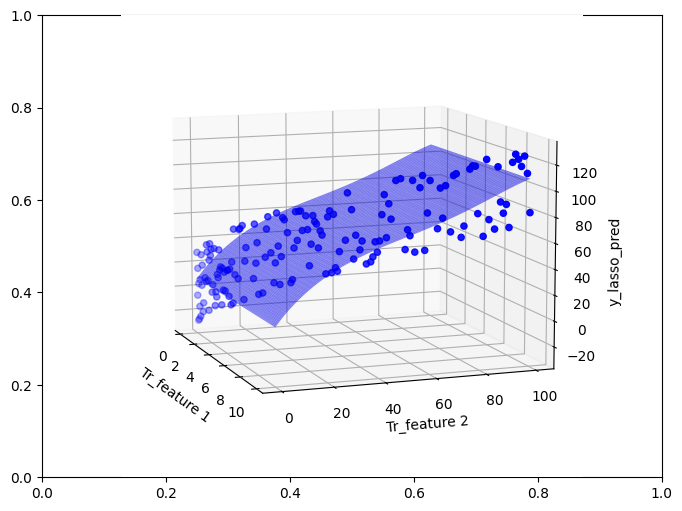

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(figsize=(8,6))


# Create a 3D scatter plot of the data
ax = fig.add_subplot(111, projection='3d', elev=10, azim=-20)
ax.scatter(X_lasso_train_tr[:, 0], X_lasso_train_tr[:, 1], y_lasso_train, c='blue', marker='o', label='True values')

# Generate a range of X_lasso_train values
x_range = np.linspace(X_lasso_train.min(), X_lasso_train.max(), 100)

# Transform the range of X_lasso_train values
x_range_tr = poly.transform(x_range.reshape(-1, 1))

# Predict the values for the range of X_lasso_train values
y_range_pred = lasso_model.predict(x_range_tr)

# Create a meshgrid of the X_lasso_train and predicted Y values
X, Y = np.meshgrid(np.array([i[0] for i in x_range_tr]), np.array([i[1] for i in x_range_tr]))

# Create the 3D plot
ax.plot_surface(X, Y, y_range_pred.reshape(-1,1), color='b', alpha = 0.5)
ax.set_xlabel('Tr_feature 1')
ax.set_ylabel('Tr_feature 2')
ax.set_zlabel('y_lasso_pred')

plt.show()


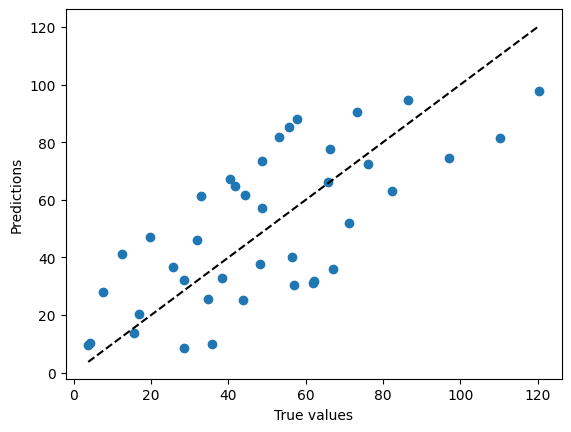

In [44]:
import matplotlib.pyplot as plt

# Plot the predictions against the true values
plt.scatter(y_lasso_test, y_lasso_pred)

# Add a 45 degree line
x = np.linspace(np.min(y_lasso_test), np.max(y_lasso_test), 2)
plt.plot(x, x, '--k')

plt.xlabel('True values')
plt.ylabel('Predictions')

plt.show()

In [45]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate the mean absolute error and R^2 score
r2_mlr = r2_score(y_lasso_test, y_lasso_pred)
mae_mlr = mean_absolute_error(y_lasso_test, y_lasso_pred)

# Print the results
print(f"R^2 Score: {r2_mlr:.2f}")
print(f"Mean Absolute Error: {mae_mlr:.2f}")
print(f"Root mean Absolute Error: {mae_mlr**0.5:.2f}")

R^2 Score: 0.44
Mean Absolute Error: 17.96
Root mean Absolute Error: 4.24


Placeholder to compare the results from polynomial model versus those using lasso regression.

## 1.1.4 Decision Tree Regression

Decision tree regressor is a supervised learning model that predicts a continuous target variable based on a set of input features. The model builds a decision tree by recursively splitting the data into subsets based on the value of a selected feature, such that the subsets have the highest possible purity in terms of the target variable. The splits are chosen to minimize the variance in the target variable, which is the sum of the squared differences between the actual and predicted values. Once the tree is built, new data points are classified by following the splits in the tree until reaching a leaf node, which provides the predicted value for the target variable. Decision trees are interpretable and can capture non-linear relationships between the features and the target variable. However, they are prone to overfitting and can be sensitive to the choice of the hyperparameters. While decision trees can be used for both classification and regression problems, they are more commonly associated with classification because they are particularly effective at handling categorical variables and creating easily interpretable models.

Below provides an example of using decision tree in a multi variable problem.

In [46]:
# Clear all previous variables
%reset -f

In [47]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from graphviz import Source

In [48]:
# Generate the dataset with 20 features
X_dt, y_dt = make_regression(n_samples=200, n_features=20, noise=20, random_state=42)

In [49]:
# Split the data into training and test sets
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

In [50]:
# Create a decision tree regressor model
model_dt = DecisionTreeRegressor(random_state=42)

In [51]:
# Define the parameter grid for hyper parameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4, 8, 16],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'splitter': ['best', 'random'],
}

# Use GridSearchCV for hyper parameter tuning
grid_search = GridSearchCV(model_dt, param_grid=param_grid, cv=5)
grid_search.fit(X_dt_train, y_dt_train)

# Print the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)

c:\Users\Farhad.Davaripour\Anaconda3\envs\main\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\Farhad.Davaripour\Anaconda3\envs\main\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\Farhad.Davaripour\Anaconda3\envs\main\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\Farhad.Davaripour\Anaconda3\envs\main\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

Best Hyperparameters:  {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}


In [52]:
# Fit the model to the data using the best hyper parameters
model_dt = DecisionTreeRegressor(random_state=42, **grid_search.best_params_)
results_dt = model_dt.fit(X_dt_train, y_dt_train)

# Predict using the model
y_dt_pred = model_dt.predict(X_dt_test)

In [53]:
# Get the feature importances of the model
features = ['Feature_'+str(i) for i in range(1,21)]
importances = model_dt.feature_importances_
for feature, importance in zip(features, importances):
    print(f'{feature} importance: {importance:.3f}')

Feature_1 importance: 0.024
Feature_2 importance: 0.000
Feature_3 importance: 0.020
Feature_4 importance: 0.000
Feature_5 importance: 0.153
Feature_6 importance: 0.000
Feature_7 importance: 0.000
Feature_8 importance: 0.000
Feature_9 importance: 0.049
Feature_10 importance: 0.018
Feature_11 importance: 0.025
Feature_12 importance: 0.000
Feature_13 importance: 0.006
Feature_14 importance: 0.412
Feature_15 importance: 0.224
Feature_16 importance: 0.000
Feature_17 importance: 0.044
Feature_18 importance: 0.000
Feature_19 importance: 0.024
Feature_20 importance: 0.000


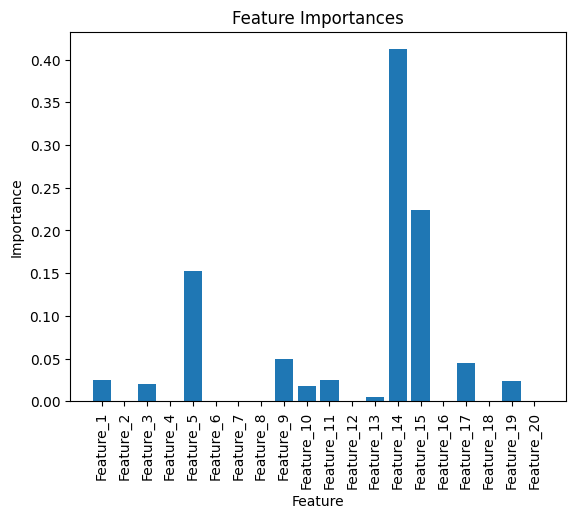

In [54]:
# Plot the feature importances
plt.bar(features, importances)
plt.title("Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()

In [55]:
# Calculate the mean absolute error and R^2 score
r2_dt = r2_score(y_dt_test, y_dt_pred)
mae_dt = mean_absolute_error(y_dt_test, y_dt_pred)

# Print the results
print(f"R^2 Score: {r2_dt:.2f}")
print(f"Mean Absolute Error: {mae_dt:.2f}")
print(f"Root mean Absolute Error: {mae_dt**0.5:.2f}")

R^2 Score: 0.47
Mean Absolute Error: 97.23
Root mean Absolute Error: 9.86


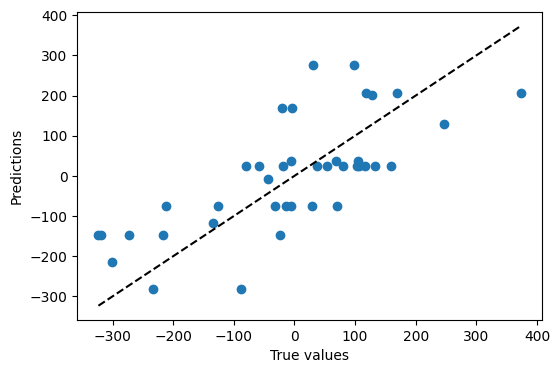

In [56]:
# Plot the predictions against the true values
fig, ax = plt.subplots(figsize = (6,4))
plt.scatter(y_dt_test, y_dt_pred)
x = np.linspace(np.min(y_dt_test), np.max(y_dt_test), 2)
plt.plot(x, x, '--k')
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

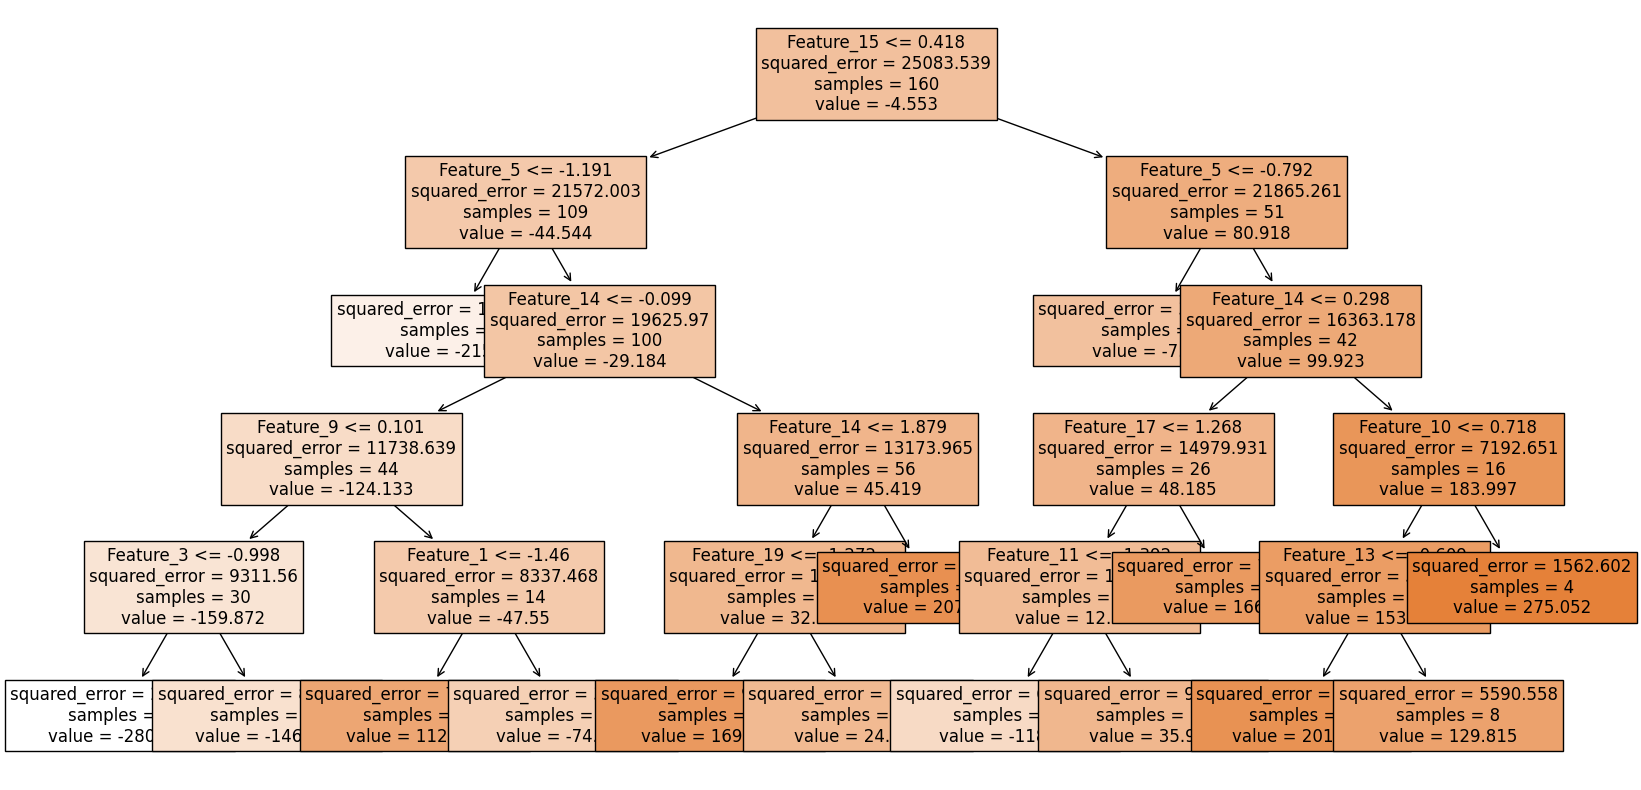

In [57]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(model_dt, feature_names=features, ax=ax, fontsize=12, filled=True)
plt.show()

I put a placeholder in here to provide the code for calculating the inpurity (sauqred error).

In the visualization above each node in the tree represents a decision or a test on a particular feature, and the branches represent the outcomes of the test. The leaf nodes represent the final decision or prediction. The nodes are labeled with the squared error, and the number of samples that passed through the node. The value field in each node represents the distribution of the target variable in that node. The impurity field (squared error) in each node represents the degree of impurity in that node. The filled parameter in the plot_tree() function colors the nodes based on their impurity, with darker colors indicating higher impurity. By analyzing the decision tree, we can gain insights into the relationships between the features and the target variable, and identify the most important features for making accurate predictions.

## 1.1.5 Ensemble Learning - Random Forest

Random Forest Regression is an ensemble learning method that combines multiple decision trees to create a more accurate and robust model. It works by building multiple decision trees on randomly sampled subsets of the training data, and then averaging their predictions to obtain the final prediction. Compared to Decision Tree Regression, Random Forest Regression provides improved accuracy, robustness, generalization, and feature importance, making it a powerful and flexible non-linear regression algorithm.

In [58]:
# Clear all previous variables
%reset -f

In [59]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [60]:
# Generate the dataset with 20 features
X_rf, y_rf = make_regression(n_samples=200, n_features=20, noise=20, random_state=42)

In [61]:
# Split the data into training and test sets
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

In [62]:
# Create a random forest regressor model
model_rf = RandomForestRegressor(random_state=42)

In [63]:
# Define the parameter grid for hyper parameter tuning
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Use GridSearchCV for hyper parameter tuning
grid_search = GridSearchCV(model_rf, param_grid=param_grid, cv=5)
grid_search.fit(X_rf_train, y_rf_train)

# Print the best hyper parameters
print("Best Hyper Parameters: ", grid_search.best_params_)

Best Hyper Parameters:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}


In [64]:
# Fit the model to the data using the best hyper parameters
model_rf = RandomForestRegressor(random_state=42, **grid_search.best_params_)
results_rf = model_rf.fit(X_rf_train, y_rf_train)

# Predict using the model
y_rf_pred = model_rf.predict(X_rf_test)

In [65]:
# Calculate the mean absolute error and R^2 score
r2_rf = r2_score(y_rf_test, y_rf_pred)
mae_rf = mean_absolute_error(y_rf_test, y_rf_pred)

# Print the results
print(f"R^2 Score: {r2_rf:.2f}")
print(f"Mean Absolute Error: {mae_rf:.2f}")
print(f"Root mean Absolute Error: {mae_rf**0.5:.2f}")

R^2 Score: 0.76
Mean Absolute Error: 55.50
Root mean Absolute Error: 7.45


In [66]:
# Get the feature importances of the model
features = ['Feature_'+str(i) for i in range(1,21)]
importances = model_rf.feature_importances_
for feature, importance in zip(features, importances):
    print(f'{feature} importance: {importance:.2f}')

# Print the results
print(f"R^2 Score: {r2_rf:.2f}")
print(f"Mean Absolute Error: {mae_rf:.2f}")
print(f"Root mean Absolute Error: {mae_rf**0.5:.2f}")

Feature_1 importance: 0.01
Feature_2 importance: 0.01
Feature_3 importance: 0.01
Feature_4 importance: 0.02
Feature_5 importance: 0.08
Feature_6 importance: 0.01
Feature_7 importance: 0.01
Feature_8 importance: 0.05
Feature_9 importance: 0.11
Feature_10 importance: 0.06
Feature_11 importance: 0.01
Feature_12 importance: 0.01
Feature_13 importance: 0.01
Feature_14 importance: 0.46
Feature_15 importance: 0.10
Feature_16 importance: 0.01
Feature_17 importance: 0.01
Feature_18 importance: 0.01
Feature_19 importance: 0.01
Feature_20 importance: 0.01
R^2 Score: 0.76
Mean Absolute Error: 55.50
Root mean Absolute Error: 7.45


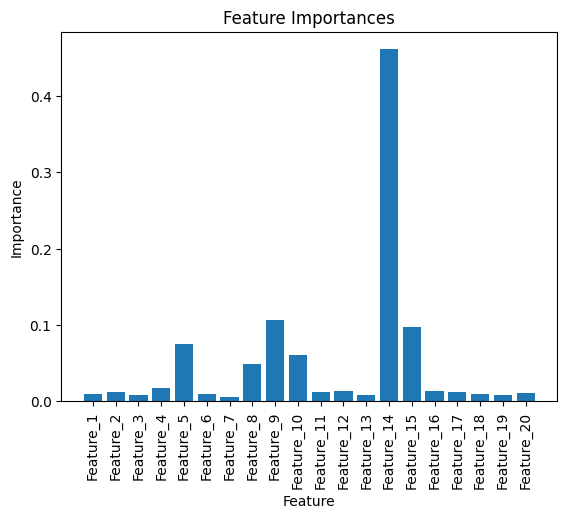

In [67]:
# Plot the feature importances
plt.bar(features, importances)
plt.title("Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()

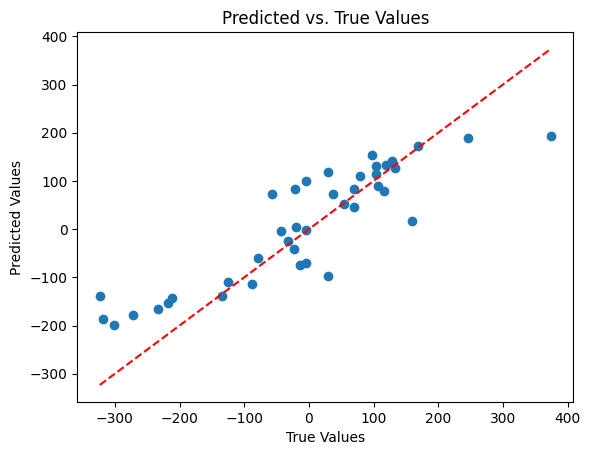

In [68]:
# Visualize the predicted values against the true values
plt.scatter(y_rf_test, y_rf_pred)
plt.plot([y_rf_test.min(), y_rf_test.max()], [y_rf_test.min(), y_rf_test.max()], 'r--')
plt.title("Predicted vs. True Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

I put a placeholder in here to compare the results of the decision tree with those from random forrest.

## References


[1] Géron, Aurélien. Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.", 2019.

[2] https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

[3] https://towardsdatascience.com/what-is-feature-engineering-importance-tools-and-techniques-for-machine-learning-2080b0269f10#:~:text=Feature%20engineering%20is%20the%20process,design%20and%20train%20better%20features.